Visualisation des graphiques

Graphique souhaités : - Création des produits par années (bargraph)

In [1]:
import pandas as pd

# Charger le fichier CSV final
df = pd.read_csv('nutriments_vides_cleaned.csv')

# Afficher les colonnes disponibles
print("Colonnes disponibles :")
print(df.columns.tolist())  # Liste les noms de colonnes

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_308\664183765.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('nutriments_vides_cleaned.csv')


Colonnes disponibles :
['code', 'url', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 'last_modified_by', 'last_updated_t', 'last_updated_datetime', 'product_name', 'quantity', 'brands', 'brands_tags', 'categories', 'categories_tags', 'categories_en', 'labels', 'labels_tags', 'labels_en', 'countries', 'countries_tags', 'countries_en', 'ingredients_text', 'ingredients_tags', 'ingredients_analysis_tags', 'serving_size', 'serving_quantity', 'additives_n', 'additives_tags', 'additives_en', 'nutriscore_score', 'nutriscore_grade', 'nova_group', 'pnns_groups_1', 'pnns_groups_2', 'food_groups', 'food_groups_tags', 'food_groups_en', 'states', 'states_tags', 'states_en', 'ecoscore_score', 'ecoscore_grade', 'nutrient_levels_tags', 'product_quantity', 'unique_scans_n', 'popularity_tags', 'completeness', 'last_image_t', 'last_image_datetime', 'main_category', 'main_category_en', 'image_url', 'image_small_url', 'image_ingredients_url', 'image_ingredients_sma

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_308\3428786600.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('nutriments_vides_cleaned.csv')


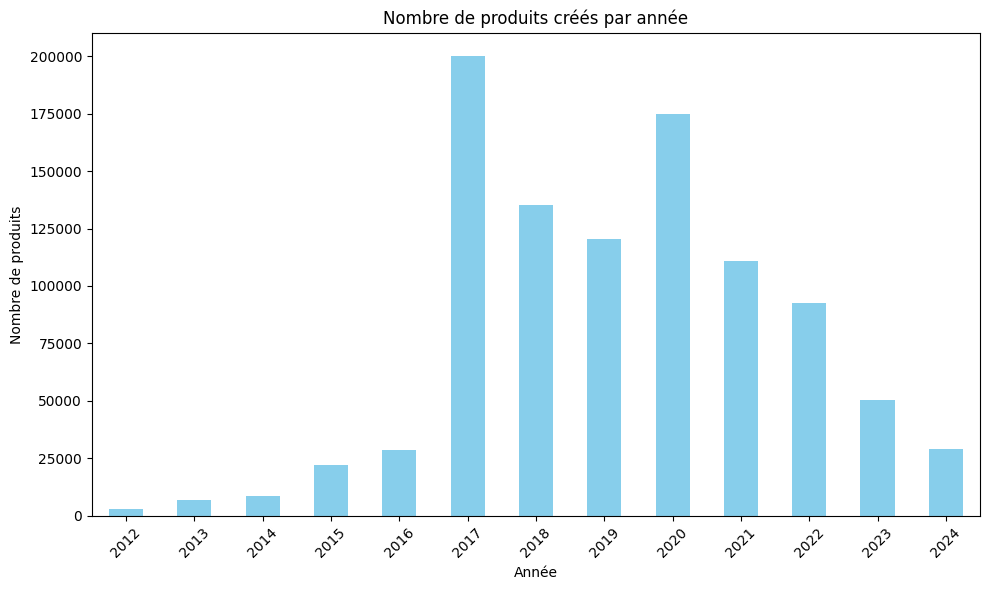

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le fichier CSV
df = pd.read_csv('nutriments_vides_cleaned.csv') 

# Extraire l'année de création des produits
df['année_creation'] = pd.to_datetime(df['created_datetime']).dt.year

produits_par_année = df['année_creation'].value_counts().sort_index()

# Créer un graphique en barres
plt.figure(figsize=(10, 6))
produits_par_année.plot(kind='bar', color='skyblue')
plt.title('Nombre de produits créés par année')
plt.xlabel('Année')
plt.ylabel('Nombre de produits')
plt.xticks(rotation=45)
plt.tight_layout()

# Afficher le graphique
plt.show()

Analyse des pays : 
les pays dans (countries_en) sont à split (ex: 
Afghanistan,France,Germany)- stocker les différents pays dans une liste - comparer la liste avec une base de données pays - supprimer les pays erronnés- remplir les pays vide par “unknown

In [3]:
import pandas as pd

# Chemin vers votre fichier CSV
file_path = 'nutriments_vides_cleaned.csv'

# Chargement du fichier CSV
df = pd.read_csv(file_path)

# Affichage de la colonne 'countries'
print(df['countries_en'])

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_308\1195369853.py:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


0         Germany,United States
1                Czech Republic
2                        France
3                 India,Senegal
4                 United States
                  ...          
983030                   France
983031                  Germany
983032                   France
983033                   France
983034                   France
Name: countries_en, Length: 983035, dtype: object


C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_308\1998359903.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=top_countries.values, y=top_countries.index, palette="Blues_d")


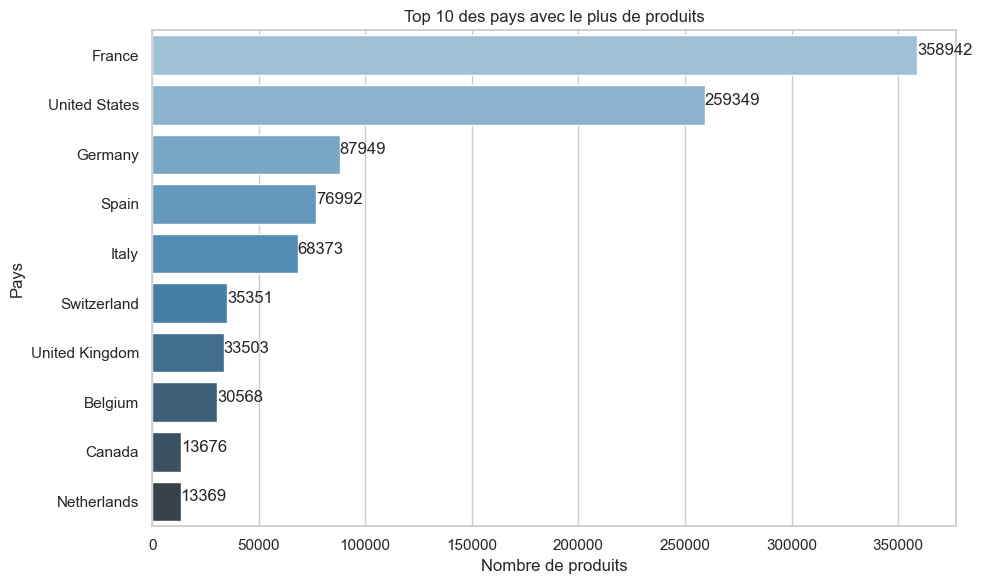

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pycountry  

# Fichier CSV nettoyé
input_file = 'nutriments_vides_cleaned.csv'

# Lire les données
df = pd.read_csv(input_file, sep=",", encoding="UTF-8", low_memory=False)

# Supprimer les lignes où 'countries_en' est vide
df['countries_en'] = df['countries_en'].fillna('unknown')

# Splitter la colonne 'countries_en' en plusieurs pays
df['countries_en'] = df['countries_en'].str.split(',')

# Exploser les listes en lignes (chaque pays devient une ligne)
df_exploded = df.explode('countries_en')

# Supprimer les espaces supplémentaires avant/après les noms des pays
df_exploded['countries_en'] = df_exploded['countries_en'].str.strip()

# Comparer la liste avec une base de données officielle des pays (pycountry)
def is_valid_country(country):
    if country.lower() == 'unknown':
        return True  # Garder "unknown" comme valide
    try:
        pycountry.countries.lookup(country)  # Valider le pays
        return True
    except LookupError:
        return False

# Appliquer la validation des pays
df_exploded['valid_country'] = df_exploded['countries_en'].apply(is_valid_country)

# Supprimer les pays erronés
df_valid_countries = df_exploded[df_exploded['valid_country'] == True]

# Compter le nombre de produits par pays
country_counts = df_valid_countries['countries_en'].value_counts()

# Visualiser les 10 pays avec le plus de produits
top_countries = country_counts.head(10)

# Configuration de Seaborn pour des graphiques plus élégants
sns.set(style="whitegrid")

# Créer un graphique à barres
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=top_countries.values, y=top_countries.index, palette="Blues_d")

# Ajouter des étiquettes sur les barres
for index, value in enumerate(top_countries.values):
    bar_plot.text(value, index, str(value))

plt.title('Top 10 des pays avec le plus de produits')
plt.xlabel('Nombre de produits')
plt.ylabel('Pays')
plt.tight_layout()

# Afficher le graphique
plt.show()

Analyse des catégories :- categories_en','pnns_groups_1','pnns_groups_2','main_cate
gory_en- les catégories sont à split
remplir les catégories vide par “unknown”

Je les affiches 

In [5]:
import pandas as pd

# Charger le fichier CSV nettoyé
df_cleaned = pd.read_csv('nutriments_vides_cleaned.csv')

# Vérifier si les colonnes demandées existent dans le DataFrame
columns_to_display = ['categories_en', 'pnns_groups_1', 'pnns_groups_2', 'main_category_en']

# Vérification des colonnes disponibles
missing_columns = [col for col in columns_to_display if col not in df_cleaned.columns]
if missing_columns:
    print(f"Les colonnes suivantes sont manquantes : {missing_columns}")
else:
    # Afficher les 10 premières lignes des colonnes demandées
    print("\nDonnées des colonnes demandées :")
    print(df_cleaned[columns_to_display].head(10))

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_308\1545344401.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cleaned = pd.read_csv('nutriments_vides_cleaned.csv')



Données des colonnes demandées :
                                       categories_en          pnns_groups_1  \
0  Dietary supplements,Bodybuilding supplements,P...                unknown   
1  Snacks,Sweet snacks,Cocoa and its products,Cho...          Sugary snacks   
2  Plant-based foods and beverages,Plant-based fo...  Fruits and vegetables   
3  Beverages and beverages preparations,Plant-bas...              Beverages   
4  Dietary supplements,Bodybuilding supplements,P...                unknown   
5  Snacks,Desserts,Sweet snacks,Biscuits and cake...          Sugary snacks   
6                  Snacks,Meals,Rice dishes,Risottos        Composite foods   
7  Snacks,Sweet snacks,Biscuits and cakes,Cakes,C...          Sugary snacks   
8  Snacks,Sweet snacks,Biscuits and cakes,Cakes,C...          Sugary snacks   
9  Snacks,Sweet snacks,Biscuits and cakes,Cakes,C...          Sugary snacks   

                      pnns_groups_2      main_category_en  
0                           unknown 

Graphique souhaités : - Création des produits par années (bargraph)- Tableau de répartition par pays- faire un wordcloud des catégorie


Analyse de la colonne 'categories_en' :
categories_en
Plant-based foods and beverages    309423
Plant-based foods                  269959
Snacks                             213428
Sweet snacks                       154429
Cereals and potatoes               105792
Dairies                            105597
Beverages                           86770
Meats and their products            84385
Fermented foods                     81983
Fermented milk products             79294
Name: count, dtype: int64


C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_308\3966669880.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")


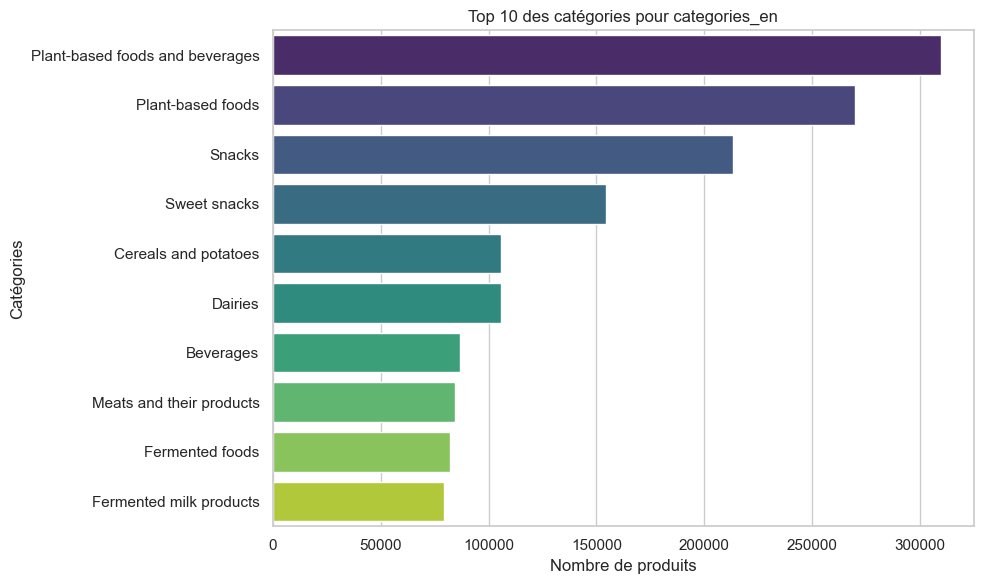


Analyse de la colonne 'pnns_groups_1' :
pnns_groups_1
Sugary snacks              1011381
Cereals and potatoes        772143
Milk and dairy products     696969
Fish Meat Eggs              597203
Fruits and vegetables       455644
Fat and sauces              399059
Beverages                   393100
unknown                     385248
Salty snacks                355419
Composite foods             306872
Name: count, dtype: int64


C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_308\3966669880.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")


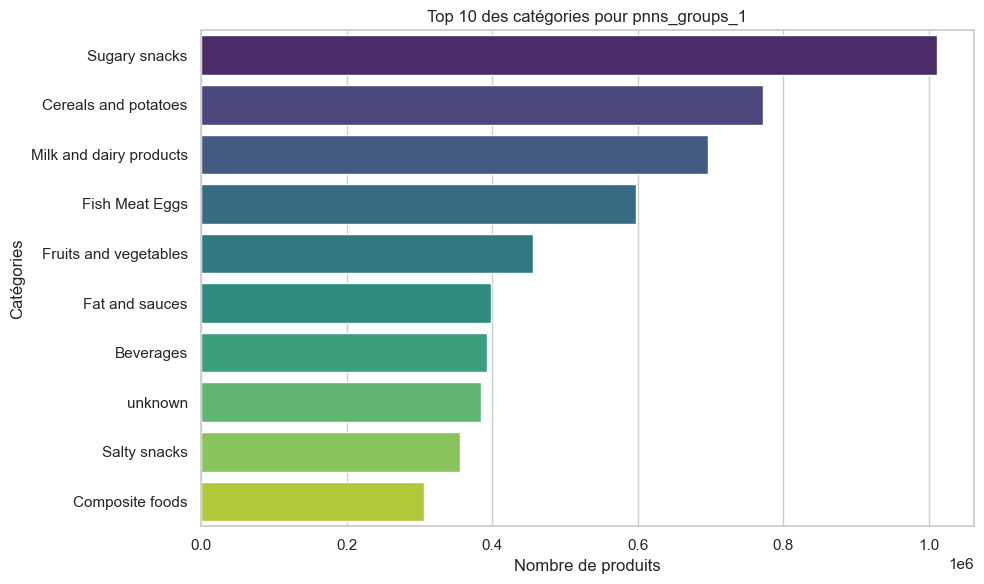


Analyse de la colonne 'pnns_groups_2' :
pnns_groups_2
Sweets                  439464
Biscuits and cakes      391374
unknown                 385248
Cereals                 349493
Cheese                  291485
Milk and yogurt         259578
Vegetables              252703
Dressings and sauces    245090
One-dish meals          229931
Processed meat          214449
Name: count, dtype: int64


C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_308\3966669880.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")


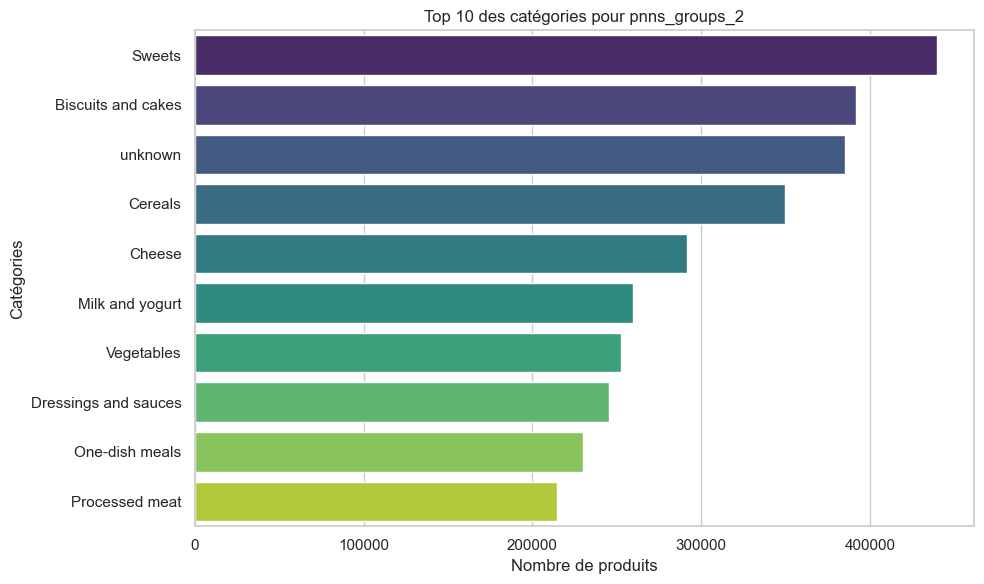


Analyse de la colonne 'main_category_en' :
main_category_en
Groceries              192542
Biscuits                70198
Cheeses                 59318
Yogurts                 56647
Virgin olive oils       44495
Breads                  41949
Confectioneries         41735
Sweetened beverages     41091
Cakes                   28826
Pastas                  28338
Name: count, dtype: int64


C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_308\3966669880.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")


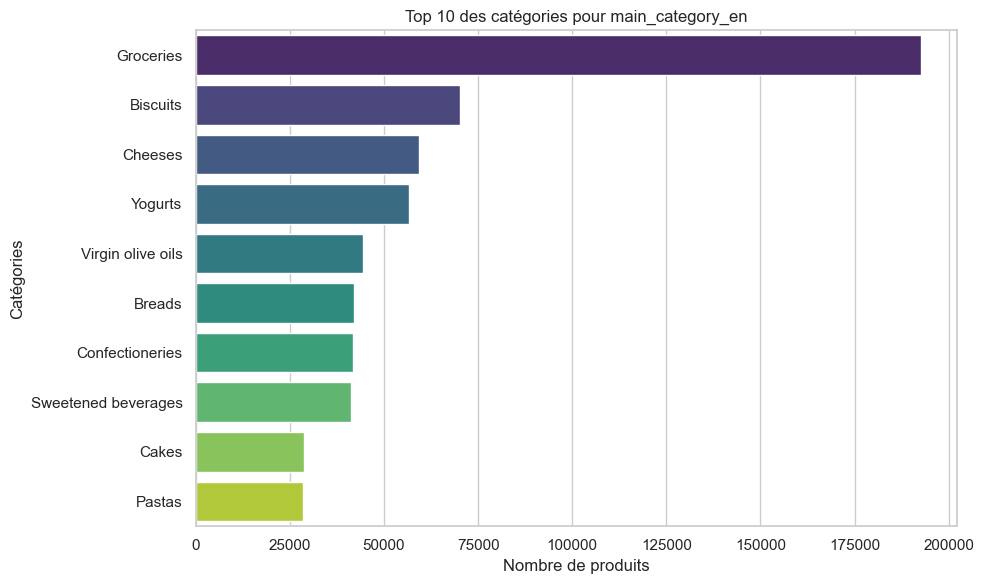

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Fichier CSV nettoyé
input_file = 'nutriments_vides_cleaned.csv'

# Lire les données
df = pd.read_csv(input_file, encoding="UTF-8", low_memory=False)

# Liste des colonnes à analyser
columns_to_analyze = ['categories_en', 'pnns_groups_1', 'pnns_groups_2', 'main_category_en']

# Remplir les champs vides par 'unknown'
df[columns_to_analyze] = df[columns_to_analyze].fillna('unknown')

# Splitter les catégories (s'il y a des listes de valeurs séparées par une virgule)
for col in columns_to_analyze:
    df[col] = df[col].str.split(',')

# Exploser les listes en lignes individuelles
for col in columns_to_analyze:
    df = df.explode(col)

# Supprimer les espaces autour des valeurs
for col in columns_to_analyze:
    df[col] = df[col].str.strip()

# Analyser la pertinence de chaque colonne en comptant les occurrences
for col in columns_to_analyze:
    print(f"\nAnalyse de la colonne '{col}' :")
    top_categories = df[col].value_counts().head(10)  # Compter les occurrences
    print(top_categories)  # Afficher les 10 premières catégories

    # Visualiser les 10 premières catégories sous forme de graphique
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")
    plt.title(f'Top 10 des catégories pour {col}')
    plt.xlabel('Nombre de produits')
    plt.ylabel('Catégories')
    plt.tight_layout()
    plt.show()

Analyse des _100g
-Vérifier les valeurs manquantes ou aberrantes
-df.describe()
-supprimer les variables redondantes
-Analyse des valeurs min et max

In [7]:
import pandas as pd

# Chargement du fichier CSV
df = pd.read_csv('nutriments_vides_cleaned.csv')

# Sélection des colonnes contenant "100g" dans leur nom
colonnes_100g = df.filter(like="100g")

# Affichage des premières lignes pour vérifier les colonnes
print(colonnes_100g.head())

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_308\3703637499.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('nutriments_vides_cleaned.csv')


   energy-kcal_100g  energy_100g   fat_100g  saturated-fat_100g  \
0          406.0000       1700.0   6.600000            4.300000   
1          578.0000       2401.0  40.900000           21.500000   
2          208.0000        840.0   0.000000            0.000000   
3           85.0000        356.0   2.400000            1.100000   
4          536.0715       2243.0  35.714284            8.928572   

   carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
0             6.70000      6.70000         NaN      80.000000   0.500000   
1            40.70000     35.00000    8.400000       7.500000   0.000000   
2             8.00000      8.00000   88.000000       0.000000   0.230000   
3             9.60000      2.20000    1.300000       5.700000   1.181102   
4            46.42857     28.57143   10.714286      10.714286   0.089286   

   sodium_100g  fruits-vegetables-nuts-estimate-from-ingredients_100g  \
0     0.200000                                           0.013317  

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_308\2343555526.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='UTF-8')


Valeurs manquantes par colonne :
creator                                                       2
last_modified_by                                           6696
last_updated_t                                             9577
last_updated_datetime                                      9577
product_name                                               5245
quantity                                                 498859
brands                                                   177123
brands_tags                                              177155
categories                                                    6
categories_tags                                               6
categories_en                                                 6
labels                                                   561264
labels_tags                                              561249
labels_en                                                561264
countries                                                  3015
countri

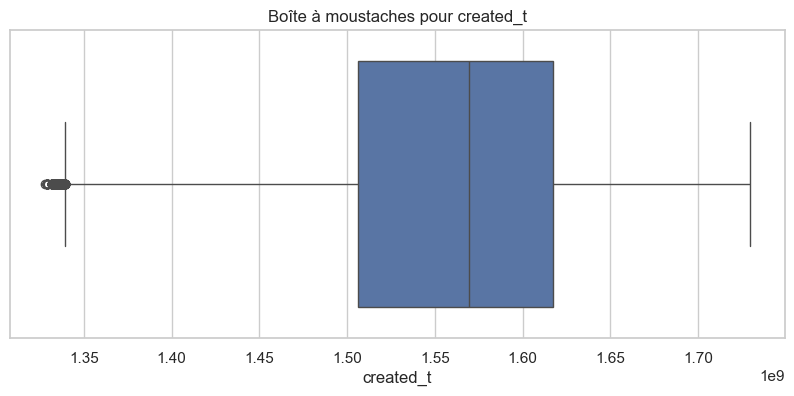

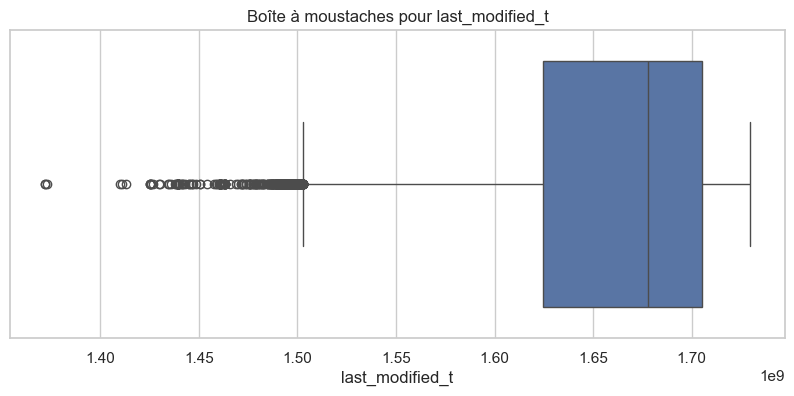

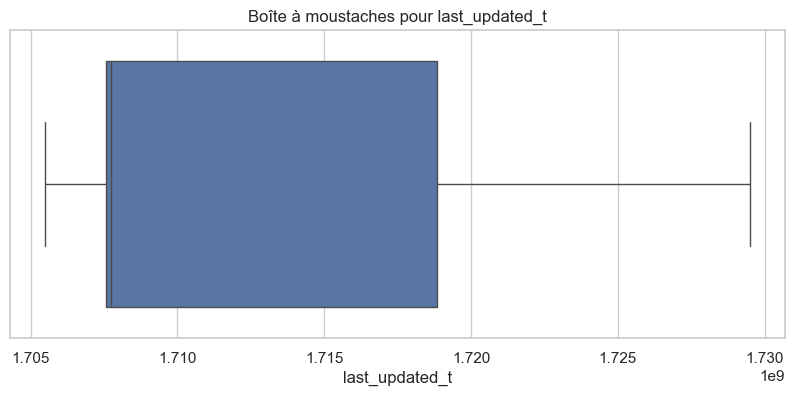

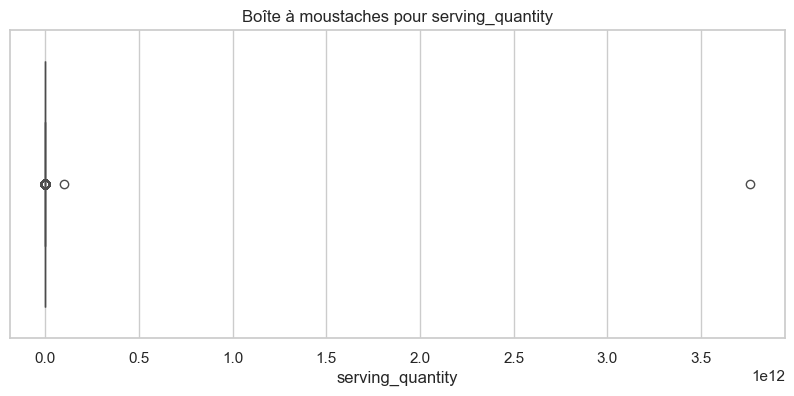

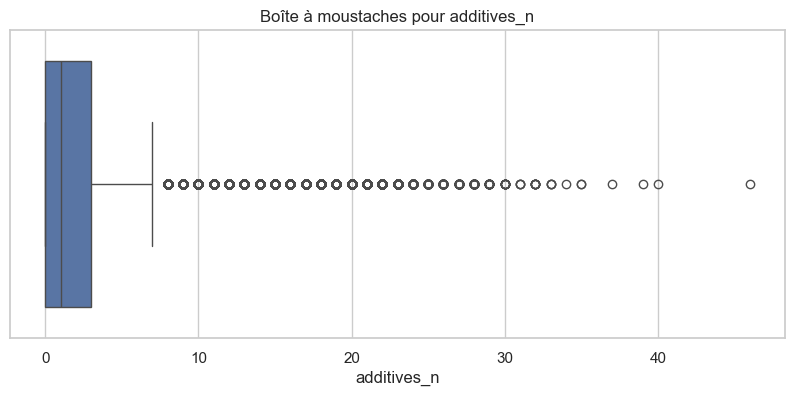

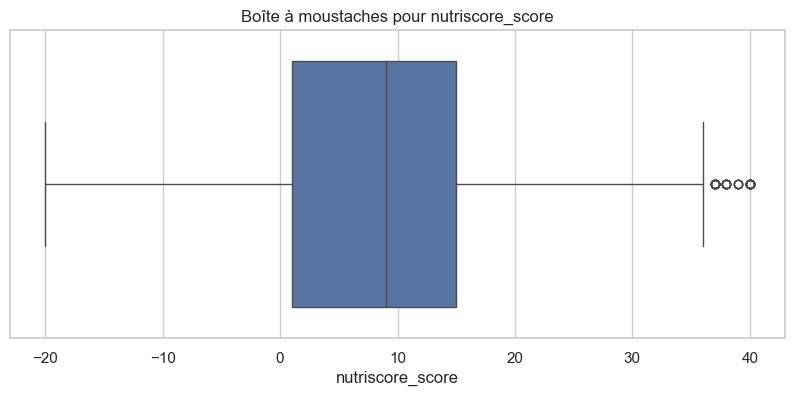

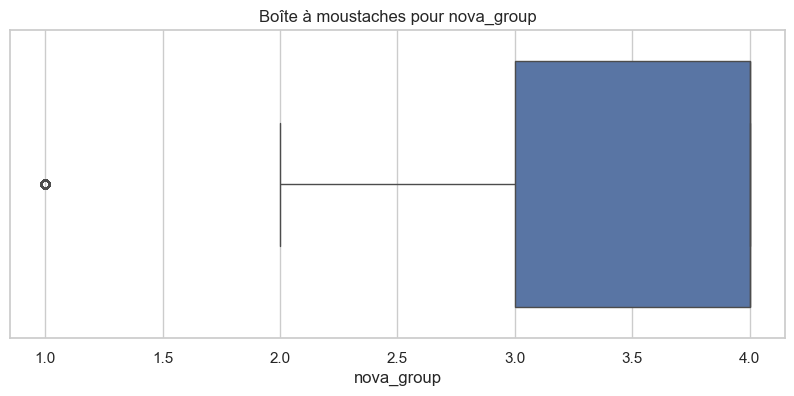

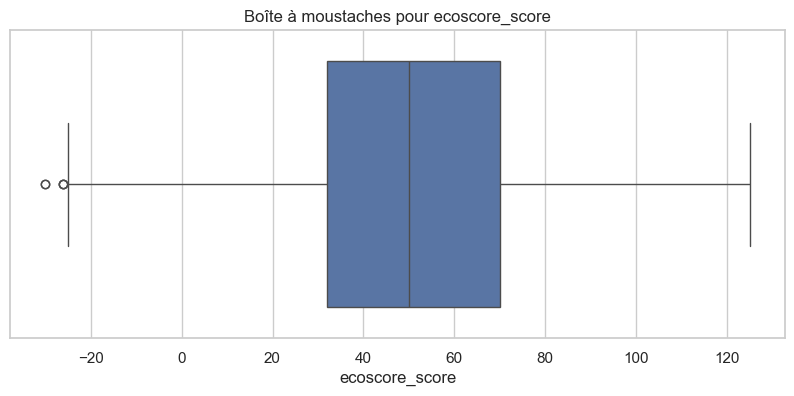

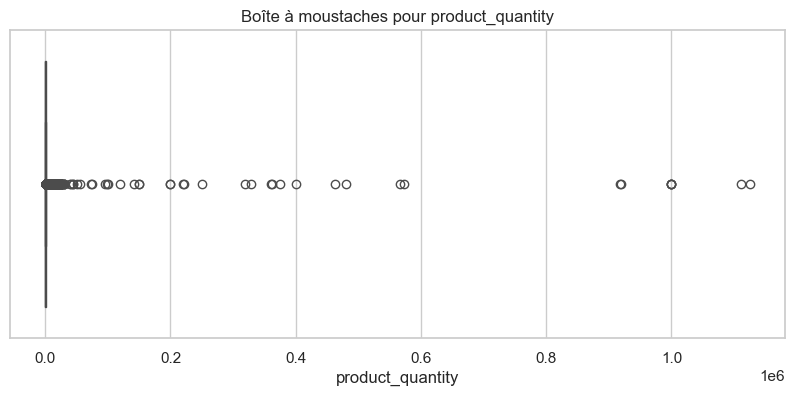

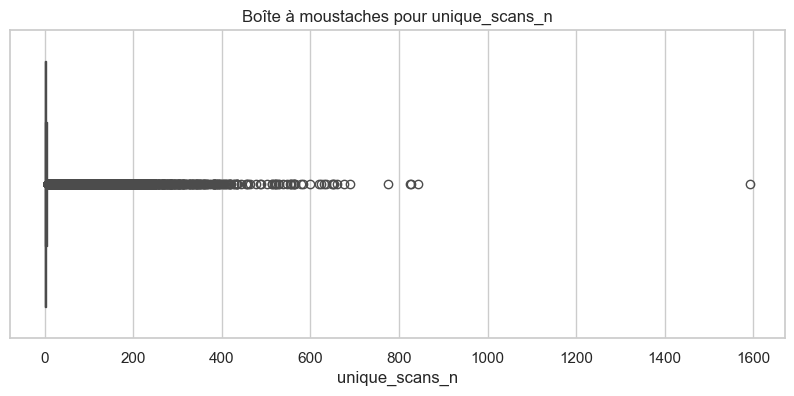

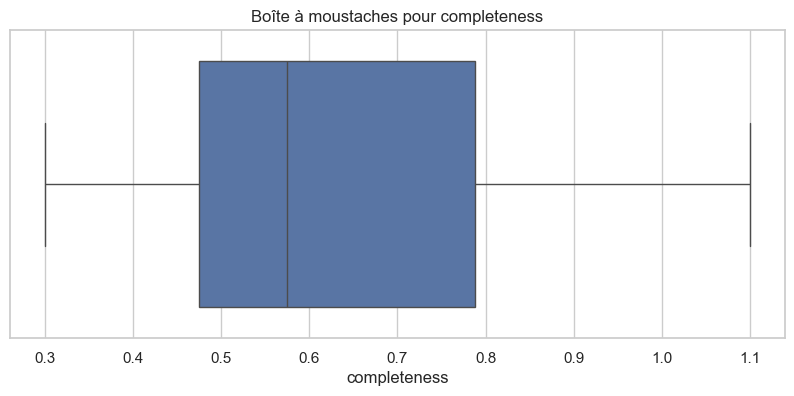

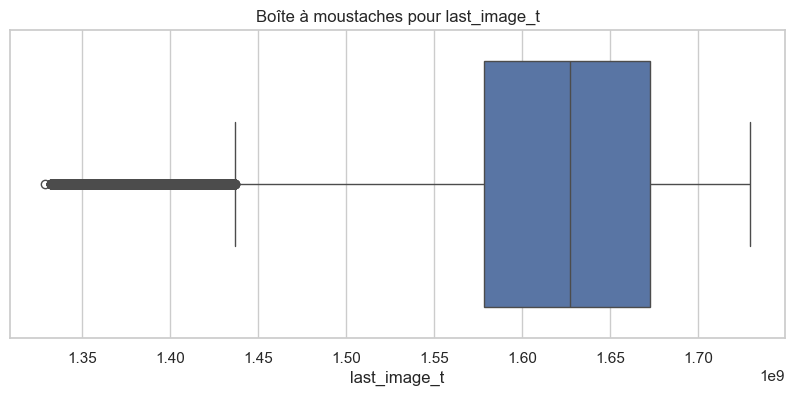

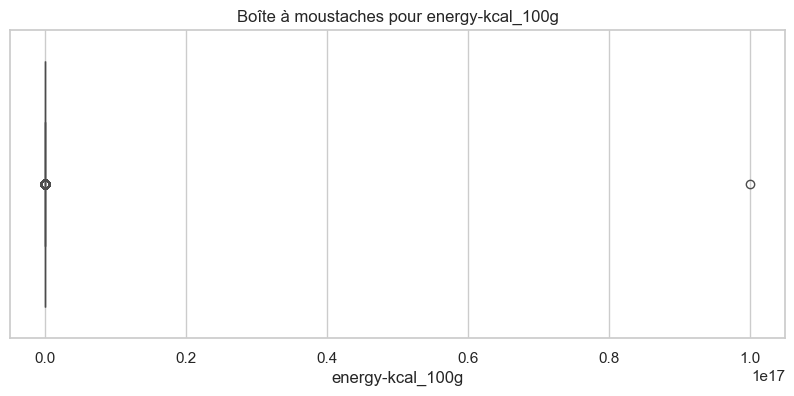

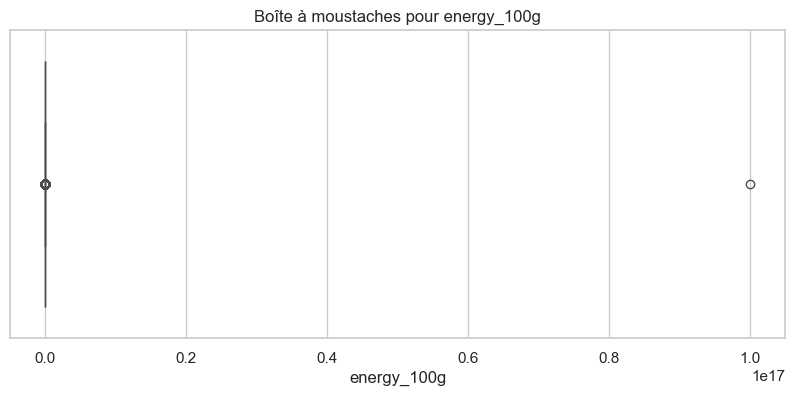

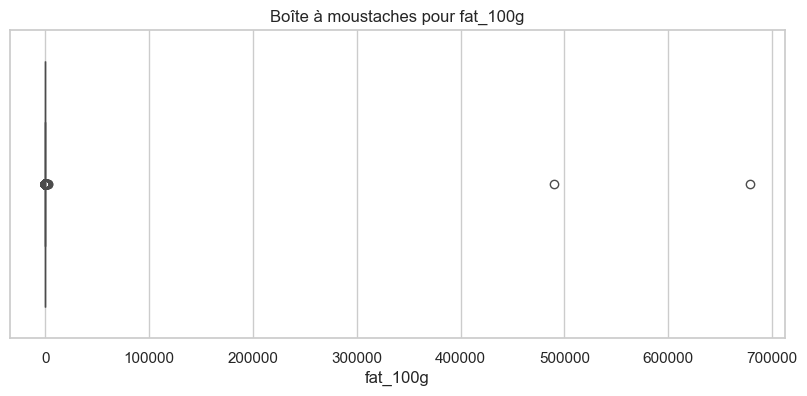

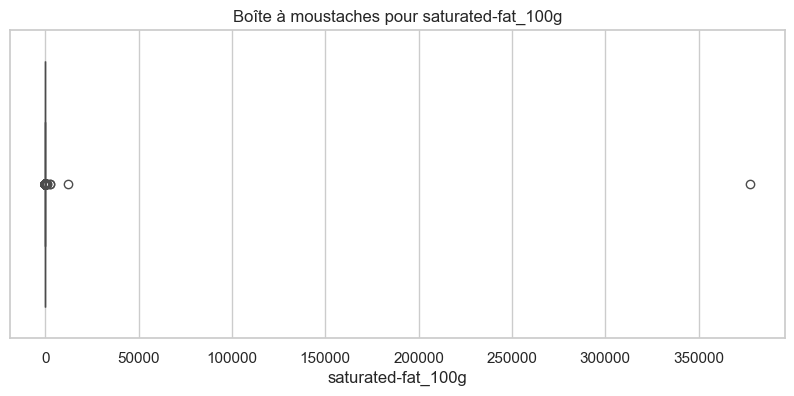

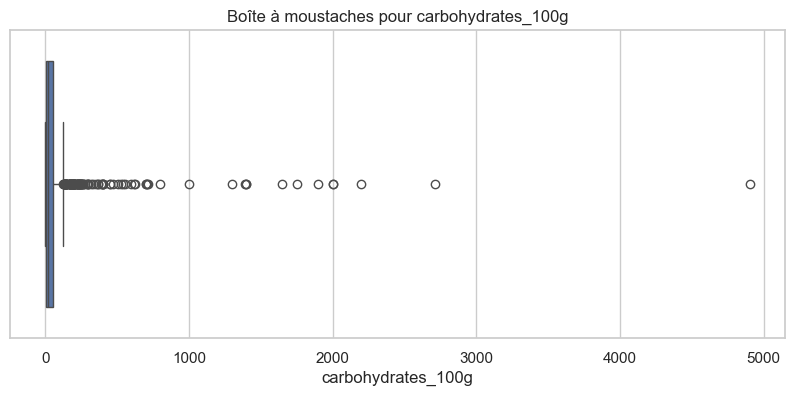

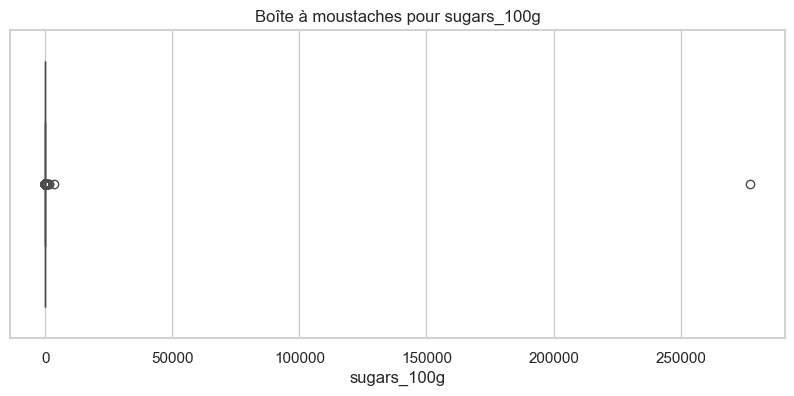

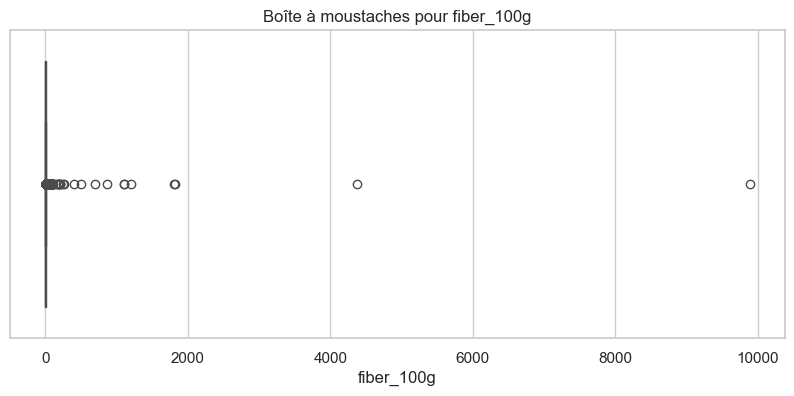

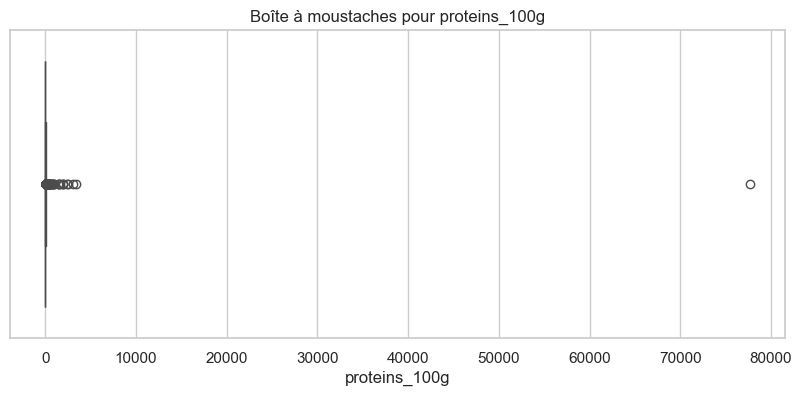

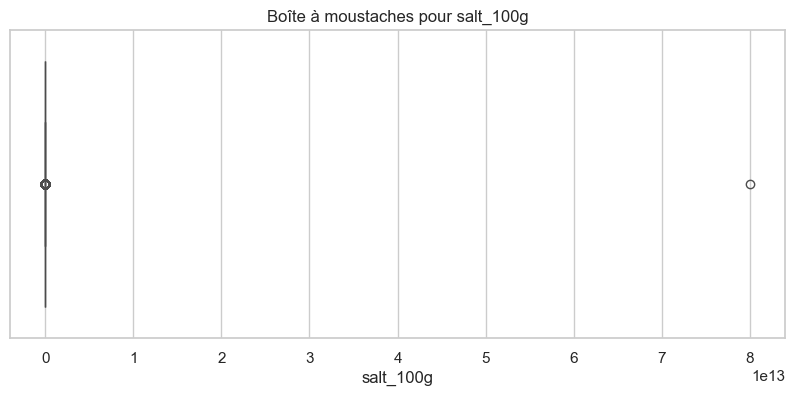

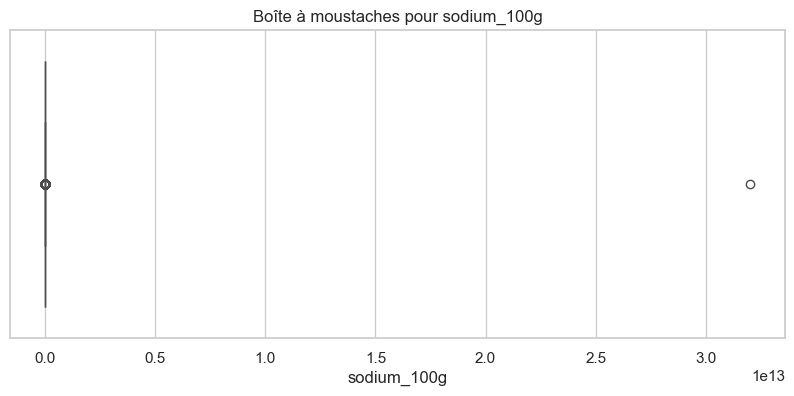

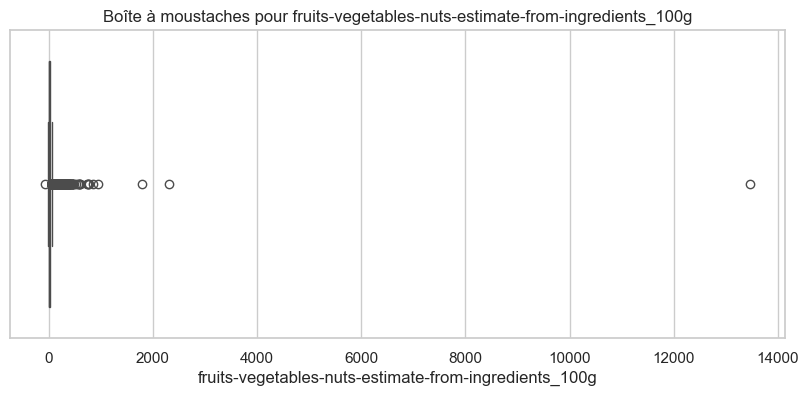

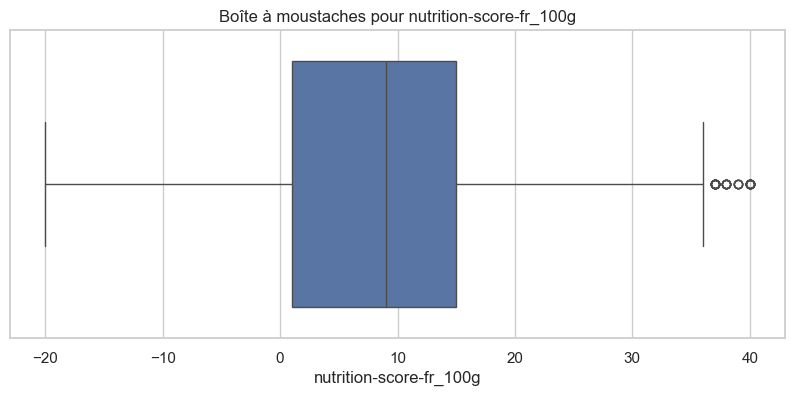

In [8]:
import pandas as pd

# Charger le fichier CSV
file_path = 'nutriments_vides_cleaned.csv'  
df = pd.read_csv(file_path, encoding='UTF-8')

# 1. Vérification des valeurs manquantes
missing_values = df.isnull().sum()
print("Valeurs manquantes par colonne :")
print(missing_values[missing_values > 0])  # Affiche uniquement les colonnes avec des valeurs manquantes

# 2. Vérification des valeurs aberrantes
# Supposons que vous avez des colonnes numériques pour lesquelles vous souhaitez détecter les valeurs aberrantes.
# Vous pouvez utiliser des statistiques descriptives pour cela.

# Affichage des statistiques descriptives
stats = df.describe()
print("\nStatistiques descriptives :")
print(stats)

# Exemple de détection d'aberrations : seuils basés sur les quartiles
# On peut définir des valeurs aberrantes comme étant en dehors de 1.5 fois l'intervalle interquartile (IQR)
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Compter les valeurs aberrantes
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"\nValeurs aberrantes pour {column} : {len(outliers)}")
    print(outliers)

# Si vous souhaitez également visualiser les valeurs aberrantes, vous pouvez utiliser des graphiques (facultatif).
import matplotlib.pyplot as plt
import seaborn as sns

# Exemple de boîte à moustaches pour chaque colonne numérique
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Boîte à moustaches pour {column}')
    plt.show()
